In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [398]:
from multi_layer_neural_network import multi_layer_neural_network 

In [399]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [400]:
def mse(outputs, targets):
    return np.mean(np.square(outputs - targets))

# Class for single layer network with batch learning

In [502]:
class single_layer_neural_network:
    def __init__(self):
        self.weights = None

    def fit(self, patterns, targets, epochs=20, learning_rate=0.001, learning_rule="delta"):
        patterns = self.append_bias(patterns)

        self.init_weights(patterns.shape[0], targets.shape[0], patterns.shape[1])
        squared_errors = []

        for _i in range(epochs):
            outputs = self.weights @ patterns
            
            if learning_rule == "perceptron":
                difference = self.get_perceptron_difference(outputs, targets)
            elif learning_rule == "delta":
                difference = outputs - targets
                
            update_directions = difference @ patterns.T 
            self.weights -= learning_rate * update_directions
            
            squared_errors.append(mse(outputs, targets))
        
        w = self.weights[0] 
        boundary_points = ([0.0, -w[2]/w[1]], [-w[2]/w[0], 0.0])
        newline(boundary_points[0], boundary_points[1])
        
        return boundary_points, squared_errors
        
    def append_bias(self, patterns):
        return np.append(patterns, [np.ones(patterns.shape[1], "float")], axis=0)

    def init_weights(self, pattern_dim, target_dim, pattern_count):
        self.weights = np.random.normal(loc=0.0, scale=1.0/pattern_count, size=(target_dim, pattern_dim))
    
    def get_perceptron_difference(self, outputs, targets):
        predictions = np.array([[1.0 if o > 0 else -1.0 for o in output_rows] for output_rows in outputs])
        return (predictions - targets)/2.0

## Predictions for linearly separable dataset with delta learning

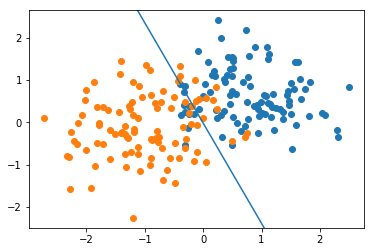

In [461]:
classA = np.random.multivariate_normal(mean=[1.0, 0.5], cov=[[0.5, 0.0],[0.0, 0.5]], size=100)
classB = np.random.multivariate_normal(mean=[-1.0, 0.0], cov=[[0.5, 0.0],[0.0, 0.5]], size=100)


samples = np.concatenate((classA, classB), axis=0)
targets = 100 *[1.0] + 100* [-1.0]
targets = np.reshape(targets, (len(targets), 1))
plt.plot(classA.T[0], classA.T[1], 'o')
plt.plot(classB.T[0], classB.T[1], 'o')

shuffled_index = np.random.permutation(200)

samples = samples[shuffled_index].T
targets = targets[shuffled_index].T

single_layer_nn = single_layer_neural_network()
boundary_points, squared_errors = single_layer_nn.fit(samples, targets)
plt.show()

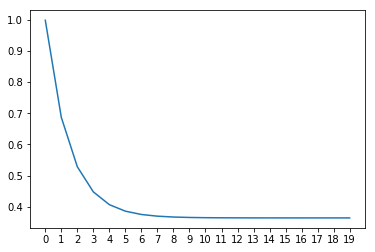

In [462]:
indices = range(0, len(squared_errors))
plt.xticks(indices)
plt.plot(indices, squared_errors)
plt.show()

## Predictions for linearly separable dataset with perceptron learnig

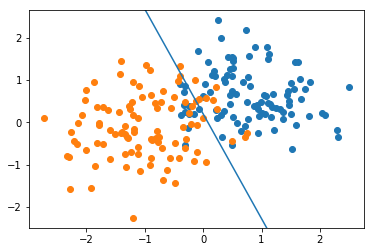

In [463]:
plt.plot(classA.T[0], classA.T[1], 'o')
plt.plot(classB.T[0], classB.T[1], 'o')

single_layer_nn = single_layer_neural_network()
boundary_points, squared_errors = single_layer_nn.fit(samples, targets, learning_rule="perceptron")
plt.show()

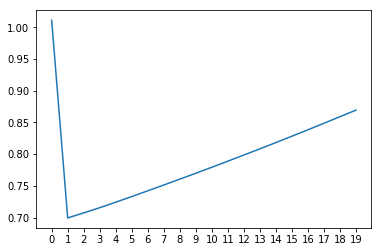

In [464]:
indices = range(0, len(squared_errors))
plt.xticks(indices)
plt.plot(indices, squared_errors)
plt.show()

## Predictions for linearly not separable dataset with delta learning

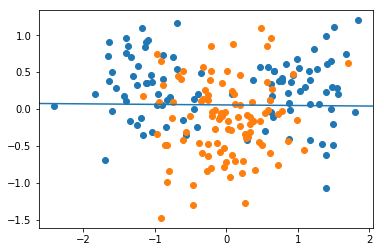

In [503]:
classA1 = np.random.multivariate_normal(mean=[1.0, 0.3], cov=[[0.2, 0.0],[0.0, 0.2]], size=50)
classA2 = np.random.multivariate_normal(mean=[-1.0, 0.3], cov=[[0.2, 0.0],[0.0, 0.2]], size=50)
classA = np.concatenate((classA1, classA2), axis=0)

classB = np.random.multivariate_normal(mean=[0.0, -0.1], cov=[[0.3, 0.0],[0.0, 0.3]], size=100)


samples = np.concatenate((classA, classB), axis=0)
targets = 100 *[1.0] + 100* [-1.0]
targets = np.reshape(targets, (len(targets), 1))
plt.plot(classA.T[0], classA.T[1], 'o')
plt.plot(classB.T[0], classB.T[1], 'o')

shuffled_index = np.random.permutation(200)

samples = samples[shuffled_index].T
targets = targets[shuffled_index].T

single_layer_nn = single_layer_neural_network()
boundary_points, squared_errors = single_layer_nn.fit(samples, targets)
plt.show()

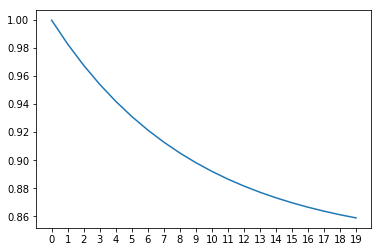

In [504]:
indices = range(0, len(squared_errors))
plt.xticks(indices)
plt.plot(indices, squared_errors)
plt.show()

## Predictions for linearly not separable dataset with perceptron learnig

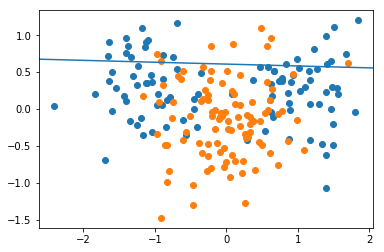

In [505]:
plt.plot(classA.T[0], classA.T[1], 'o')
plt.plot(classB.T[0], classB.T[1], 'o')

single_layer_nn = single_layer_neural_network()
boundary_points, squared_errors = single_layer_nn.fit(samples, targets, learning_rule="perceptron")
plt.show()

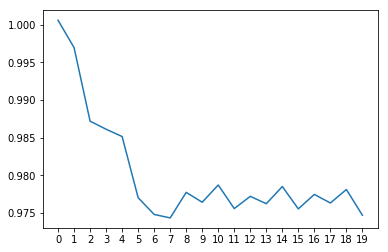

In [506]:
indices = range(0, len(squared_errors))
plt.xticks(indices)
plt.plot(indices, squared_errors)
plt.show()